<a href="https://colab.research.google.com/github/Dhaneshkp/DesktopAssistant/blob/main/GAMvsSVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 8.8 MB/s eta 0:00:00


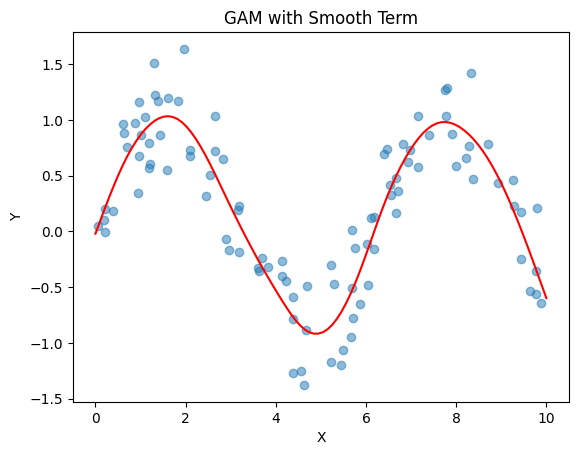

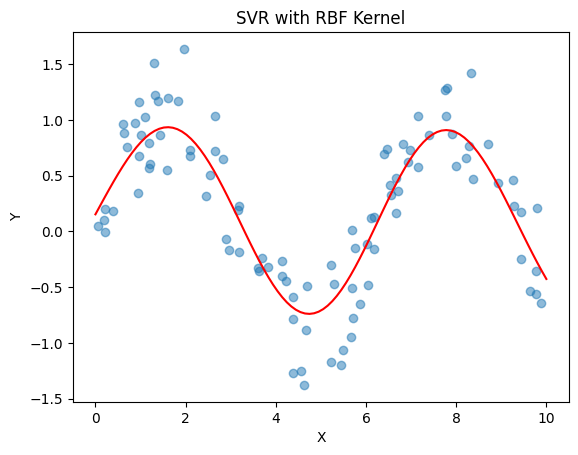

In [2]:
!pip install pygam
import numpy as np
import matplotlib.pyplot as plt
from pygam import LinearGAM, s

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # 100 observations of a single predictor
y = np.sin(X).ravel() + np.random.normal(0, 0.3, 100)  # Non-linear relationship with noise

# Fit the GAM model
gam = LinearGAM(s(0)).fit(X, y)

# Generate predictions
XX = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = gam.predict(XX)

# Plot the smooth term
plt.scatter(X, y, alpha=0.5)
plt.plot(XX, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('GAM with Smooth Term')
plt.show()

from sklearn.svm import SVR

# Fit the SVR model with RBF kernel
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X, y)

# Generate predictions
y_svr_pred = svr.predict(XX)

# Plot the SVR results
plt.scatter(X, y, alpha=0.5)
plt.plot(XX, y_svr_pred, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('SVR with RBF Kernel')
plt.show()


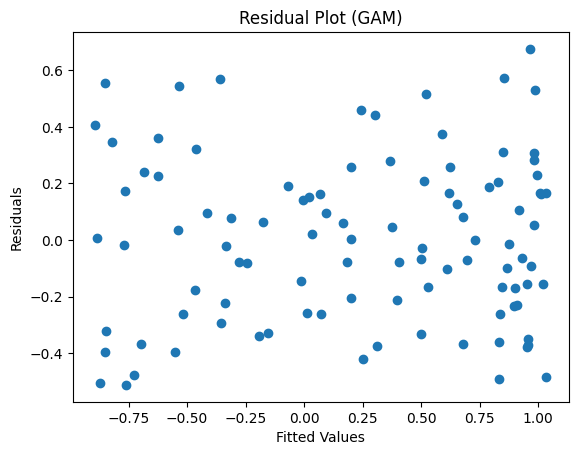

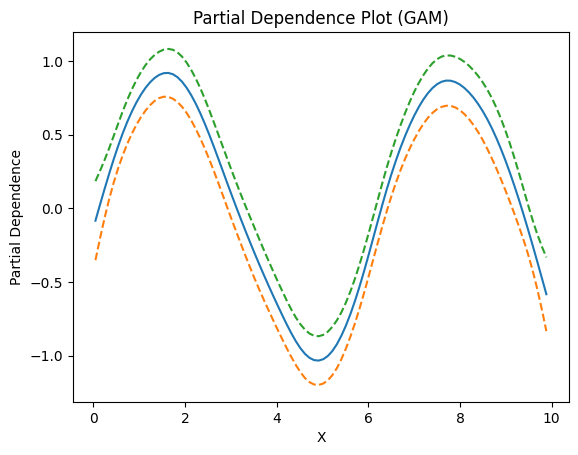

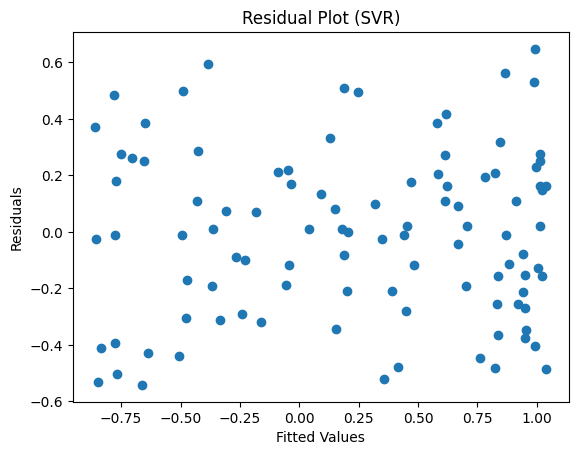

Best SVR hyperparameters: {'C': 10, 'epsilon': 0.01}


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pygam import LinearGAM, s
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# ... (generate data as before) ...

# Fit the GAM model
gam = LinearGAM(s(0)).fit(X, y)

# Diagnostics for GAM
# Residual analysis
residuals = y - gam.predict(X)
plt.scatter(gam.predict(X), residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (GAM)")
plt.show()

# Partial dependence plot
XX = gam.generate_X_grid(term=0)
pdep, confi = gam.partial_dependence(term=0, X=XX, width=.95)
plt.plot(XX, pdep)
plt.plot(XX, confi, linestyle='--')
plt.xlabel("X")
plt.ylabel("Partial Dependence")
plt.title("Partial Dependence Plot (GAM)")
plt.show()

# Fit the SVR model with RBF kernel
param_grid = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]}
svr = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)
svr.fit(X, y)

# Diagnostics for SVR
# Residual analysis
residuals_svr = y - svr.predict(X)
plt.scatter(svr.predict(X), residuals_svr)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (SVR)")
plt.show()

# Print best hyperparameters
print("Best SVR hyperparameters:", svr.best_params_)

# ... (generate predictions and plots as before) ...

In [ ]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## A Simple classifier using keras's Sequential API

### Dataset MNIST

* Its a dataset of handwritten digits
* each data point it 2d array of 28x28
* It has 10 classes 0-9
* aka hello world for ANN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

In [ ]:
f_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = f_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [ ]:
y_train_full.shape, y_train_full.dtype

((60000,), dtype('uint8'))

In [ ]:
X_test.shape, X_test.dtype

((10000, 28, 28), dtype('uint8'))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
X_valid, X_train = X_train_full[: 5000] / 255., X_train_full[5000: ]/255.
y_valid, y_train = y_train_full[: 5000], y_train_full[5000:]

X_test = X_test/255.

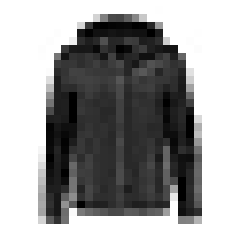

4

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()
y_train[0]

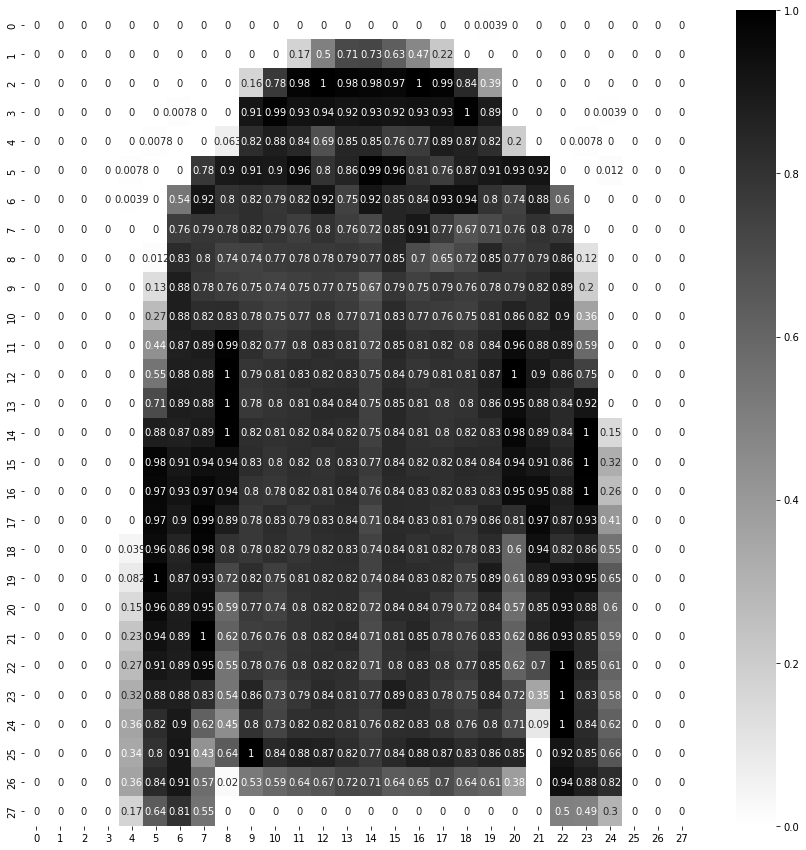

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [ ]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),

]

In [ ]:
model = tf.keras.models.Sequential(LAYERS)

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
784 * 300 + 300, 300 * 100 + 100, 100 * 10 + 10

(235500, 30100, 1010)

In [ ]:
sum([784 * 300 + 300, 300 * 100 + 100, 100 * 10 + 10])

266610

In [ ]:
hidden1 = model.layers[1]

model.get_layer(hidden1.name)

In [ ]:
hidden1.get_weights()

[array([[-0.04693424, -0.0322943 , -0.03982884, ..., -0.01660189,
          0.04306756, -0.02303645],
        [ 0.01136491,  0.04334056, -0.07181966, ..., -0.06742486,
          0.0093599 , -0.0048416 ],
        [-0.02333847, -0.02704478, -0.00952205, ...,  0.04114272,
          0.00589333, -0.03304979],
        ...,
        [-0.02062583,  0.00533032,  0.07035078, ..., -0.02431397,
         -0.01110769,  0.05037846],
        [-0.03133429, -0.03120085, -0.06281111, ...,  0.02797189,
          0.05603892, -0.0119609 ],
        [ 0.02281984,  0.02215405, -0.06423787, ..., -0.01746707,
          0.04274633,  0.07252219]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

$loss\_function(actual, pred) = error$

In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


### Important -

* **Epochs**: Integer.
    
    Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.

* **batch_size**: Integer or None.
    
    Number of samples per gradient update. If unspecified, batch_size will default to 32.
    
    *NOTE:* Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

* **validation_batch_size**: Integer or None.

    Number of samples per validation batch.
    
    If unspecified, will default to batch_size.
    
    *NOTE:* Do not specify the validation_batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

[Reference](https://www.tensorflow.org/api_docs/python/tf/keras/Model?hl=zh-tw#fit)

In [ ]:
EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train,
                    epochs=EPOCHS,
                    validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2964 - accuracy: 0.8935 - val_loss: 0.3172 - val_accuracy: 0.8838
Epoch 2/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2902 - accuracy: 0.8960 - val_loss: 0.3209 - val_accuracy: 0.8822
Epoch 3/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2844 - accuracy: 0.8968 - val_loss: 0.3070 - val_accuracy: 0.8888
Epoch 4/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2793 - accuracy: 0.8990 - val_loss: 0.3030 - val_accuracy: 0.8906
Epoch 5/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2738 - accuracy: 0.9012 - val_loss: 0.3029 - val_accuracy: 0.8888


In [ ]:
55000 / 16

3437.5

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3400 - accuracy: 0.8760


[0.3399760127067566, 0.8759999871253967]

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.296363,0.893545,0.317201,0.8838
1,0.290242,0.895964,0.320908,0.8822
2,0.284378,0.896818,0.307022,0.8888
3,0.279338,0.899036,0.302988,0.8906
4,0.273843,0.901182,0.302859,0.8888


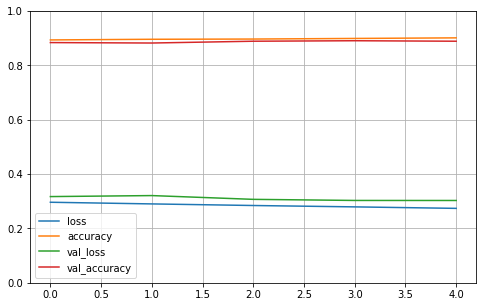

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## BN Approach one

In [ ]:
del model

In [ ]:
LAYER_BN_ONE = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),

]

In [ ]:
model = tf.keras.models.Sequential(LAYER_BN_ONE)

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_4 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 batch_normalization_5 (Batc  (None, 100)             

In [ ]:
784 * 4, 300 * 4, 100 * 4

(3136, 1200, 400)

In [ ]:
BN_params = sum([784 * 4, 300 * 4, 100 * 4])
BN_params

4736

In [ ]:
Trainable_BN_params = sum([784 * 4, 300 * 4, 100 * 4])/2
Trainable_BN_params ## Gamma, Beta

2368.0

In [ ]:
Non_Trainable_BN_params = BN_params - Trainable_BN_params
Non_Trainable_BN_params ## Mean, std deviation

2368.0

In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [ ]:
EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train,
                    epochs=EPOCHS,
                    validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5316 - accuracy: 0.8122 - val_loss: 0.3848 - val_accuracy: 0.8666
Epoch 2/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3958 - accuracy: 0.8583 - val_loss: 0.3531 - val_accuracy: 0.8770
Epoch 3/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3536 - accuracy: 0.8727 - val_loss: 0.3389 - val_accuracy: 0.8814
Epoch 4/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3239 - accuracy: 0.8829 - val_loss: 0.3324 - val_accuracy: 0.8850
Epoch 5/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3035 - accuracy: 0.8897 - val_loss: 0.3262 - val_accuracy: 0.8840


## BN Approach 2

In [ ]:
del model

In [ ]:
LAYER_BN_TWO = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300, name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Activation("relu"),
          tf.keras.layers.Dense(100, name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Activation("relu"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),

]

In [ ]:
model = tf.keras.models.Sequential(LAYER_BN_TWO)

In [ ]:
model.layers

In [ ]:
BN_layer_1 = model.layers[1]
BN_layer_1

In [ ]:
for variable in BN_layer_1.variables:
  print(variable.name, variable.trainable)

batch_normalization_6/gamma:0 True
batch_normalization_6/beta:0 True
batch_normalization_6/moving_mean:0 False
batch_normalization_6/moving_variance:0 False


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_7 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 hiddenLayer2 (Dense)        (None, 100)              

In [ ]:
784 * 4, 300 * 4, 100 * 4

(3136, 1200, 400)

In [ ]:
BN_params = sum([784 * 4, 300 * 4, 100 * 4])
BN_params

4736

In [ ]:
Trainable_BN_params = sum([784 * 4, 300 * 4, 100 * 4])/2
Trainable_BN_params ## Gamma, Beta

2368.0

In [ ]:
Non_Trainable_BN_params = BN_params - Trainable_BN_params
Non_Trainable_BN_params ## Mean, std deviation

2368.0

In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [ ]:
EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train,
                    epochs=EPOCHS,
                    validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5316 - accuracy: 0.8122 - val_loss: 0.3848 - val_accuracy: 0.8666
Epoch 2/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3958 - accuracy: 0.8583 - val_loss: 0.3531 - val_accuracy: 0.8770
Epoch 3/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3536 - accuracy: 0.8727 - val_loss: 0.3389 - val_accuracy: 0.8814
Epoch 4/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3239 - accuracy: 0.8829 - val_loss: 0.3324 - val_accuracy: 0.8850
Epoch 5/5
 877/1719 [==============>...............] - ETA: 2s - loss: 0.3052 - accuracy: 0.8887